<a href="https://colab.research.google.com/github/Zeruuuuu/Machine-Learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSCI 552 Final Project Zeru Zhou 9208818138

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from google.colab import drive
import math
import os
import splitfolders
import tensorflow_datasets as tfds
import numpy as np
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## (a) In this problem, we are trying to build a classifier that distinguishes images of 20 bird species. You are provided with text data in twenty folders.

In [ ]:
class_df = pd.read_excel('/content/drive/MyDrive/PDF_Project/Data/Classes.xlsx')
class_df

,Folder Name,Class
0,005.Crested_Auklet,0
1,013.Bobolink,1
2,015.Lazuli_Bunting,2
3,023.Brandt_Cormorant,3
4,040.Olive_sided_Flycatcher,4
5,041.Scissor_tailed_Flycatcher,5
6,067.Anna_Hummingbird,6
7,072.Pomarine_Jaeger,7
8,076.Dark_eyed_Junco,8
9,081.Pied_Kingfisher,9


I mounted the data folder from google drive to google colab.

## (b) Data Exploration and Pre-processing
### i. Images in each class are given in separate folders. The file Classes.xlsx provides the classes assigned to the bird species images in each folder. Therefore, you encode your classes using one-hot encoding and Classes.xlsx.



In [ ]:
class_df = pd.get_dummies(data=class_df, columns=['Class'])    #OneHotEncoding
class_df

,Folder Name,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,...,Class_10,Class_11,Class_12,Class_13,Class_14,Class_15,Class_16,Class_17,Class_18,Class_19
0,005.Crested_Auklet,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,013.Bobolink,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,015.Lazuli_Bunting,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,023.Brandt_Cormorant,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,040.Olive_sided_Flycatcher,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,041.Scissor_tailed_Flycatcher,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,067.Anna_Hummingbird,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,072.Pomarine_Jaeger,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,076.Dark_eyed_Junco,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,081.Pied_Kingfisher,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here I use dummies to implement OneHotEncoding.

### ii. Randomly select [0.7ni] images from each folder as your training set, [0.15ni] as validation set, and the rest as your test set, where ni is the number of images in folder i and [x] is the ceiling of x

In [ ]:
root = '/content/drive/MyDrive/PDF_Project/Data/images'

In [ ]:
os.listdir(root)

['086.Pacific_Loon',
 '141.Artic_Tern',
 '168.Kentucky_Warbler',
 '099.Ovenbird',
 '127.Savannah_Sparrow',
 '104.American_Pipit',
 '149.Brown_Thrasher',
 '156.White_eyed_Vireo',
 '135.Bank_Swallow',
 '082.Ringed_Kingfisher',
 '081.Pied_Kingfisher',
 '076.Dark_eyed_Junco',
 '072.Pomarine_Jaeger',
 '067.Anna_Hummingbird',
 '013.Bobolink',
 '040.Olive_sided_Flycatcher',
 '005.Crested_Auklet',
 '015.Lazuli_Bunting',
 '041.Scissor_tailed_Flycatcher',
 '023.Brandt_Cormorant']

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/PDF_Project/Data/images', output='output', ratio=(.7, 0.15,0.15))  # Here, I split the data into three folders, with each folders have that number of images of each class.

Copying files: 1176 files [04:09,  4.72 files/s]


Here, I splited the folder into train, test, and validation based on proportion given, for each class.

### iii. In order for all the images to have the same size, zero-pad or resize the images in your dataset. This can be done using various tools, including OpenCV.

In [ ]:
train_data = keras.utils.image_dataset_from_directory('/content/output/train', batch_size=5, image_size=(180,180), label_mode='categorical', shuffle=False)  # Here, I loaded the training data using keras data loader. 

Found 820 files belonging to 20 classes.


In [ ]:
train_label = np.concatenate([y for x, y in train_data], axis=0)
train_label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
len(train_label)


820

In [ ]:
train_feature = np.concatenate([x for x, y in train_data], axis=0)
train_feature

array([[[[145.76668 , 153.76668 , 138.76668 ],
         [146.13333 , 154.13333 , 139.13333 ],
         [145.83333 , 153.83333 , 138.83333 ],
         ...,
         [ 79.166664,  81.166664,  70.166664],
         [ 81.53335 ,  81.53335 ,  71.53335 ],
         [ 80.13332 ,  80.13332 ,  70.13332 ]],

        [[151.8     , 159.8     , 144.8     ],
         [148.1     , 156.1     , 141.1     ],
         [151.      , 159.      , 144.      ],
         ...,
         [ 80.      ,  82.      ,  71.      ],
         [ 79.899994,  81.899994,  70.899994],
         [ 80.5     ,  82.5     ,  71.5     ]],

        [[150.73332 , 158.73332 , 143.73332 ],
         [151.53333 , 159.53333 , 144.53333 ],
         [147.66667 , 155.66667 , 140.66667 ],
         ...,
         [ 83.5     ,  85.5     ,  74.5     ],
         [ 79.33334 ,  81.33334 ,  70.33334 ],
         [ 77.666664,  79.666664,  68.666664]],

        ...,

        [[186.33333 , 194.33333 , 181.33333 ],
         [185.66667 , 193.66667 , 180.66667 ]

Here, I resized the image files to (180,180) using keras.utils.image_dataset_from_directory. This process will resize the images after reading from disk. So, all the images will be resized to (180, 180). Also, I got the training features and labels for future model training.

## (c) Transfer Learning3
### i. When dealing with classification of relatively small image datasets, deep networks may not perform very well because of not having enough data to train them. In such cases, one usually uses transfer learning, which uses deep learning models that are trained on very large datasets such as ImageNet as feature extractors. The idea is that such deep networks have learned to extract meaningful features from an image using their layers, and those features can be used in learning other tasks. In order to do that, usually the last layer or the last few layers of the pre-trained network are removed, and the response of the layer before the removed layers to the images in the new dataset is used as a feature vector to train one more multiple replacement layers. The dataset in this task has only around 50-60 images per class. Given that we have 20 classes, training a deep network with such a small dataset may not yield desirable results. In this project, you will use pre-trained models EfficientNetB0 and VGG16. For both pre-trained networks, you will only train the last fully connected layer, and will freeze all layers before them (i.e. we do not change their parameters during training) and use the outputs of the penultimate layer in the original pre-trained model as the features extracted from each image.


In [ ]:
# keras.applications.efficientnet.EfficientNetB0(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', **kwargs)
# tf.keras.applications.vgg16.VGG16( include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')

These two pre-trained networks will help us generate features since our feature space is small.

### ii. To perform empirical regularization, crop, randomly zoo, rotate, flip, contrast, and translate images in your training set for image augmentation. You can use various tools to do this, including OpenCV.

In [ ]:
l1 = keras.layers.Rescaling(scale=1./255)
l2 = keras.layers.RandomCrop(180, 180)
l3 = keras.layers.RandomZoom(height_factor=(-0.3, 0.3), width_factor=(-0.3, 0.3))
l4 = keras.layers.RandomRotation(factor=0.2)
l5 = keras.layers.RandomFlip()
l6 = keras.layers.RandomContrast(factor=0.2) 
l7 = keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)

In [ ]:
dt1 = keras.layers.Normalization()(train_feature)
dt1 = tfds.as_numpy(dt1)

In [ ]:
dt = train_feature  # Initialize the data. I plan to use numpy to concat seven image datasets to get my new training set.
layers = [l2,l3,l4,l5,l6,l7]
for i in range(6):
  layer = layers[i]
  data = layer(train_feature)
  data = tfds.as_numpy(data)
  dt = np.concatenate([dt, data])
len(dt)

5740

In [ ]:
dt.shape

(5740, 180, 180, 3)

In [ ]:
label = train_label
for i in range(6):
  label = np.concatenate([label, train_label])
len(label)

5740

As above, I used keras's preprocessing methods including regularization, crop, rotate, flip, contrast, zoom, and translate the images. I stored the augmented data and their label into numpy array, and it has total 5740 files after augmentation.

### iii. Use ReLU activation functions in the last layer and a softmax layer, along with batch normalization 4 and a dropout rate of 20% as well as ADAM optimizer. Use multinomial cross entropy loss. You can try any batch size, but a batch size of 5 seems reasonable


In [ ]:
model = keras.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.ReLU(),
    keras.layers.Softmax()
]
)

In [ ]:
adm = keras.optimizers.Adam()

In [ ]:
model.compile(optimizer=adm, loss='categorical_crossentropy', metrics=['accuracy'])

As above I updated the model with dropout rate 20%, ReLU, softmax, and BatchRegularization. I complied the model with optimizer ADAM, loss categorical_crossentropy

### iv. Train the networks (EfficientNetB0 and VGG16) for at least 50 epochs (preferably 100 epochs) and perform early stopping using the validation set. Keep the network parameters that have the lowest validation error. Plot the training and validation errors vs. epochs.

### Efficient Net

In [ ]:
aug_model= keras.Sequential([
    keras.layers.RandomCrop(180, 180),
    keras.layers.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),
    keras.layers.RandomRotation(factor=0.15),
    keras.layers.RandomFlip(),
    keras.layers.RandomContrast(factor=0.1),
    keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
])

In [ ]:
val_data = keras.utils.image_dataset_from_directory('/content/output/val', batch_size=5, image_size=(180,180), label_mode='categorical', shuffle=False)

Found 171 files belonging to 20 classes.


In [ ]:
val_x, val_y = np.concatenate([x for x, y in val_data]), np.concatenate([y for x, y in val_data])

In [ ]:
label.shape

(5740, 20)

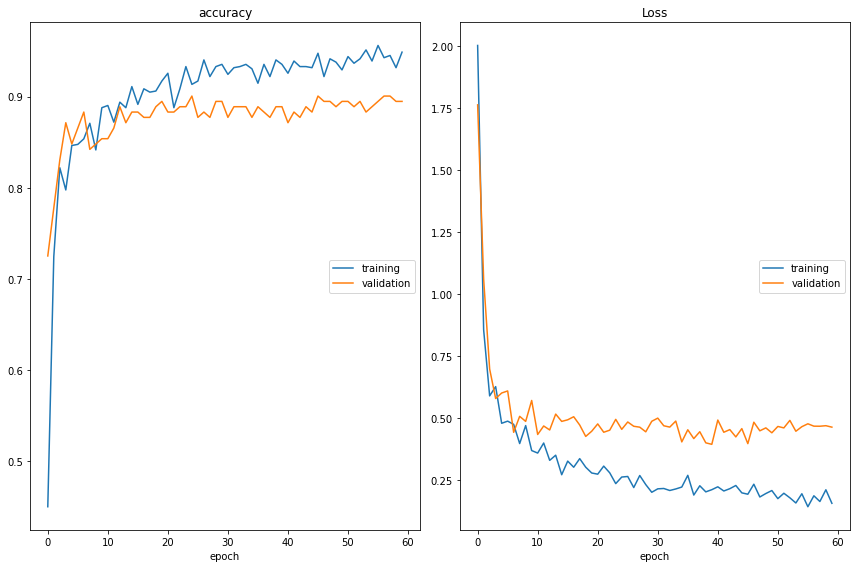

accuracy
	training         	 (min:    0.450, max:    0.956, cur:    0.949)
	validation       	 (min:    0.725, max:    0.901, cur:    0.895)
Loss
	training         	 (min:    0.142, max:    2.003, cur:    0.156)
	validation       	 (min:    0.394, max:    1.763, cur:    0.463)
26/26 [==============================] - 5s 212ms/step - loss: 0.1561 - accuracy: 0.9488 - val_loss: 0.4633 - val_accuracy: 0.8947


In [ ]:
# Build model with top layer replaced
inputs = keras.layers.Input(shape=(180, 180, 3))
x = aug_model(inputs)
model_eff = keras.applications.EfficientNetB0(include_top=False, input_tensor=x, weights='imagenet')
model_eff.trainable = False
x = keras.layers.GlobalMaxPooling2D()(model_eff.output)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(0.2)(x)

# Compile model
outputs = keras.layers.Dense(units=20, activation='softmax')(x)
model_eff = keras.Model(inputs, outputs)
model_eff.compile(optimizer=adm, loss='CategoricalCrossentropy', metrics=['accuracy'])

# Train model with early stop
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_eff.fit(train_feature, train_label, epochs=100, callbacks=[callback, PlotLossesKeras()], validation_data=(val_x, val_y))

### VGG16

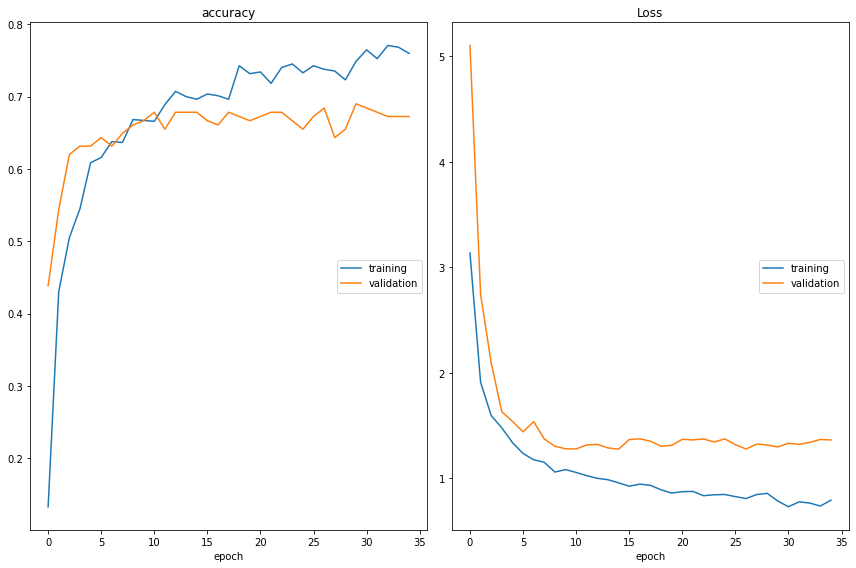

accuracy
	training         	 (min:    0.133, max:    0.771, cur:    0.760)
	validation       	 (min:    0.439, max:    0.690, cur:    0.673)
Loss
	training         	 (min:    0.731, max:    3.135, cur:    0.793)
	validation       	 (min:    1.276, max:    5.102, cur:    1.364)
26/26 [==============================] - 6s 213ms/step - loss: 0.7935 - accuracy: 0.7598 - val_loss: 1.3639 - val_accuracy: 0.6725


In [ ]:
# Build model with top layer replaced
inputs = keras.layers.Input(shape=(180, 180, 3))
x = aug_model(inputs)
model_vgg = keras.applications.vgg16.VGG16(include_top=False, input_tensor=x, weights='imagenet')
model_vgg.trainable = False
x = keras.layers.GlobalMaxPooling2D()(model_vgg.output)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Dropout(0.2)(x)

# Compile model
outputs = keras.layers.Dense(units=20, activation='softmax')(x)
model_vgg = keras.Model(inputs, outputs)
model_vgg.compile(optimizer=adm, loss='CategoricalCrossentropy', metrics=['accuracy'])

# Train model with early stop
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_vgg.fit(train_feature, train_label, epochs=100, callbacks=[callback, PlotLossesKeras()], validation_data=(val_x, val_y))

As above, I plot the train/validation accuracy and loss of each epoch. Finally EfficientNetB0 got a better performance.

### v. Report Precision, Recall, and F1 score for your model. Remember that this is a multi-class classification problem.

In [ ]:
test_data = keras.utils.image_dataset_from_directory('/content/output/test', batch_size=5, image_size=(180,180), label_mode='categorical', shuffle=False)

Found 185 files belonging to 20 classes.


In [ ]:
test_x, test_y = np.concatenate([x for x, y in test_data]), np.concatenate([y for x, y in test_data])

In [ ]:
summary = {'accuracy score':[], 'precision':[], 'recall':[], 'f1 score':[]}

In [ ]:
y_pred_eff = model_eff.predict(test_x)
y_pred_vgg = model_vgg.predict(test_x)
y_pred_eff = (y_pred_eff > 0.5) 
y_pred_vgg = (y_pred_vgg > 0.5) 
test_y = (test_y > 0.5)

6/6 [==============================] - 0s 20ms/step


In [ ]:
summary['accuracy score'].append(accuracy_score(test_y, y_pred_eff))
summary['accuracy score'].append(accuracy_score(test_y, y_pred_vgg))

summary['precision'].append(precision_score(test_y, y_pred_eff, average='micro'))
summary['precision'].append(precision_score(test_y, y_pred_vgg, average='micro'))

summary['recall'].append(recall_score(test_y, y_pred_eff, average='micro'))
summary['recall'].append(recall_score(test_y, y_pred_vgg, average='micro'))

summary['f1 score'].append(f1_score(test_y, y_pred_eff, average='micro'))
summary['f1 score'].append(f1_score(test_y, y_pred_vgg, average='micro'))

In [ ]:
summary_df = pd.DataFrame(summary)

In [ ]:
summary_df.index = ['EfficientNetB0', 'VGG16']

In [ ]:
summary_df

,accuracy score,precision,recall,f1 score
EfficientNetB0,0.843243,0.876404,0.843243,0.859504
VGG16,0.643243,0.734568,0.643243,0.685879


As above, I put accuracy, precision, recall, and f1 score in the dataframe shown above.